In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import mglearn
import IPython.display as display
import matplotlib.pyplot as plt
import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

C:\Users\rangs\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


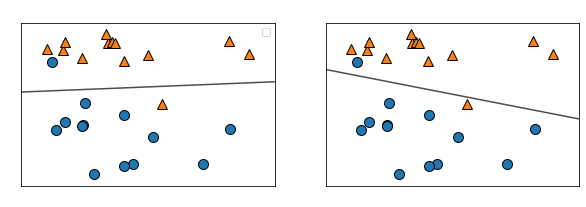

In [14]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for madel, ax in zip([LinearSVC(), LogisticRegression()], axes):
        #두 모델 호출자의 인자로 max_iter을 넘겨줄 수 있다
        
    clf = madel.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
        #fill인자는 경계면 색칠. True: 채우기, False: 안채우기
        
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__, color = 'white')
    ax.set_xlabel("Feature 0", color = 'white')
    ax.set_ylabel("Feature 1", color = 'white')    
axes[0].legend("")

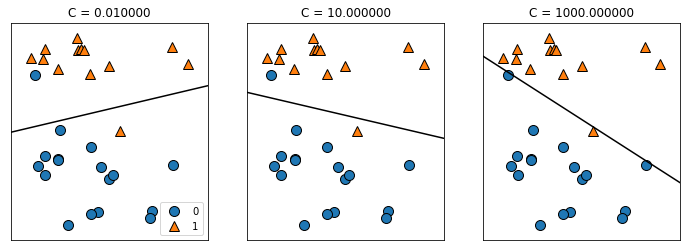

In [13]:
#C를 높이면 훈련 세트에 최대한 맞추려고 한다
mglearn.plots.plot_linear_svc_regularization()

In [4]:
#유방암(many-featured dataset)에서의 LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training Set Score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Testing Set Score: {:.3f}".format(logreg.score(X_test, y_test)))

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training Set Score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Testing Set Score: {:.3f}".format(logreg100.score(X_test, y_test)))

logreg001 = LogisticRegression(C=.01).fit(X_train, y_train)
print("Training Set Score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Testing Set Score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training Set Score: 0.948
Testing Set Score: 0.958
Training Set Score: 0.958
Testing Set Score: 0.965
Training Set Score: 0.937
Testing Set Score: 0.930


C:\Users\rangs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rangs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [5]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'V']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f}인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coef Value")

plt.ylim(-5, 5)
plt.legend(loc=3)

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.